# METRICS
### 1. Noise Reduction / Image Quality Metrics

#### MSE (Mean Squared Error)
**Formula**: 
\[
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (I_1(i) - I_2(i))^2
\]
**Jupyter Code**:
```python
import numpy as np

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)
```

#### PSNR (Peak Signal-to-Noise Ratio)
**Formula**: 
\[
\text{PSNR} = 10 \cdot \log_{10} \left(\frac{255^2}{\text{MSE}}\right)
\]
**Jupyter Code**:
```python
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    return 10 * np.log10(255**2 / mse_value)
```

#### SSIM (Structural Similarity Index)
**Formula**: 
\[
\text{SSIM}(I_1, I_2) = \frac{(2\mu_1\mu_2 + C_1)(2\sigma_{12} + C_2)}{(\mu_1^2 + \mu_2^2 + C_1)(\sigma_1^2 + \sigma_2^2 + C_2)}
\]
**Jupyter Code**:
```python
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(imageA, imageB):
    return ssim(imageA, imageB, data_range=imageB.max() - imageB.min())
```

#### RMSE (Root Mean Squared Error)
**Formula**: 
\[
\text{RMSE} = \sqrt{\text{MSE}}
\]
**Jupyter Code**:
```python
def rmse(imageA, imageB):
    return np.sqrt(mse(imageA, imageB))
```

---

### 2. Segmentation Metrics

#### Jaccard Index (IoU)
**Formula**: 
\[
\text{IoU} = \frac{|A \cap B|}{|A \cup B|}
\]
**Jupyter Code**:
```python
def jaccard_index(predicted, ground_truth):
    intersection = np.logical_and(predicted, ground_truth)
    union = np.logical_or(predicted, ground_truth)
    return np.sum(intersection) / np.sum(union)
```

#### Dice Coefficient (F1 Score)
**Formula**: 
\[
\text{Dice} = \frac{2 |A \cap B|}{|A| + |B|}
\]
**Jupyter Code**:
```python
def dice_coefficient(predicted, ground_truth):
    intersection = np.logical_and(predicted, ground_truth)
    return 2 * np.sum(intersection) / (np.sum(predicted) + np.sum(ground_truth))
```

#### Rand Index
**Formula**: 
\[
\text{Rand Index} = \frac{TP + TN}{TP + TN + FP + FN}
\]
**Jupyter Code**:
```python
from sklearn.metrics import rand_score

def rand_index(predicted, ground_truth):
    return rand_score(ground_truth.flatten(), predicted.flatten())
```

#### Precision & Recall
**Formulas**: 
\[
\text{Precision} = \frac{TP}{TP + FP}
\]
\[
\text{Recall} = \frac{TP}{TP + FN}
\]
**Jupyter Code**:
```python
def precision_recall(predicted, ground_truth):
    TP = np.sum(np.logical_and(predicted == 1, ground_truth == 1))
    FP = np.sum(np.logical_and(predicted == 1, ground_truth == 0))
    FN = np.sum(np.logical_and(predicted == 0, ground_truth == 1))
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return precision, recall
```

#### Hausdorff Distance
**Formula**: 
\[
d_H(A, B) = \max\{ \min_{b \in B} d(a, b) : a \in A\}
\]
**Jupyter Code**:
```python
from scipy.spatial.distance import directed_hausdorff

def hausdorff_distance(predicted, ground_truth):
    pred_coords = np.argwhere(predicted)
    gt_coords = np.argwhere(ground_truth)
    return max(directed_hausdorff(pred_coords, gt_coords)[0], directed_hausdorff(gt_coords, pred_coords)[0])
```

#### Pixel Accuracy
**Formula**: 
\[
\text{Pixel Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]
**Jupyter Code**:
```python
def pixel_accuracy(predicted, ground_truth):
    TP = np.sum(np.logical_and(predicted == 1, ground_truth == 1))
    TN = np.sum(np.logical_and(predicted == 0, ground_truth == 0))
    total_pixels = predicted.size
    return (TP + TN) / total_pixels
```

---

### 3. Edge Detection Metrics

#### Precision, Recall, F1 Score
**Formulas**: 
- Precision: \(\text{Precision} = \frac{TP}{TP + FP}\)
- Recall: \(\text{Recall} = \frac{TP}{TP + FN}\)
- F1 Score: \(\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}\)

**Jupyter Code**:
```python
def edge_metrics(predicted, ground_truth):
    TP = np.sum(np.logical_and(predicted == 1, ground_truth == 1))
    FP = np.sum(np.logical_and(predicted == 1, ground_truth == 0))
    FN = np.sum(np.logical_and(predicted == 0, ground_truth == 1))
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score
```

#### Pratt’s Figure of Merit (FOM)
**Formula**: 
\[
\text{FOM} = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{1 + d_i}
\]
**Jupyter Code**:
```python
def pratt_fom(predicted, ground_truth):
    # Assuming predicted and ground_truth are binary edge maps
    # Compute distances from predicted edges to nearest ground truth edges
    pred_coords = np.argwhere(predicted)
    gt_coords = np.argwhere(ground_truth)
    distances = []
    
    for p in pred_coords:
        distances.append(np.min(np.linalg.norm(gt_coords - p, axis=1)))
    
    return np.mean(1 / (1 + np.array(distances)))
```

#### Edge Preservation Index (EPI)
**Formula**: 
\[
\text{EPI} = \frac{\sum_{i} \text{edge strength}_{\text{original}} - \text{edge strength}_{\text{processed}}}{\sum_{i} \text{edge strength}_{\text{original}}}
\]
**Jupyter Code**:
```python
def edge_preservation_index(original, processed):
    original_edges = cv2.Canny(original, 100, 200)
    processed_edges = cv2.Canny(processed, 100, 200)
    
    original_strength = np.sum(original_edges)
    processed_strength = np.sum(processed_edges)
    
    return (original_strength - processed_strength) / original_strength
```

---

### 4. Enhancement Metrics (Contrast, Brightness, Sharpness)

#### Contrast Improvement Index (CII)
**Formula**: 
\[
\text{CII} = \frac{\text{Contrast}_{\text{enhanced}} - \text{Contrast}_{\text{original}}}{\text{Contrast}_{\text{original}}}
\]
**Jupyter Code**:
```python
def contrast_improvement_index(original, enhanced):
    original_contrast = np.std(original)
    enhanced_contrast = np.std(enhanced)
    return (enhanced_contrast - original_contrast) / original_contrast
```

#### Entropy
**Formula**: 
\[
H(X) = -\sum_{i} p(x_i) \log(p(x_i))
\]
**Jupyter Code**:
```python
from skimage.measure import shannon_entropy

def calculate_entropy(image):
    return shannon_entropy(image)
```

#### Tenengrad or Variance of Laplacian
**Formula**: 
\[
\text{Sharpness} = \text{Var}(\nabla^2 I)
\]
**Jupyter Code**:
```python
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()
```

#### Histogram Spread / Standard Deviation
**Formula**: 
\[
\text{Standard Deviation} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
\]
**Jupyter Code**:
```python
def histogram_spread(image):
    return np.std(image)
```

#### AMBE (Absolute Mean Brightness Error)
**Formula**: 
\[
\text{AMBE} = \left| \mu_{\text{original}} - \mu_{\text{enhanced}} \right|
\]
**Jupyter Code**:
```python
def ambe(original, enhanced):
    return np.abs(np.mean(original) - np.mean(enhanced))
```

---

### 5. Color Image Evaluation Metrics

#### CIEDE2000 / CIELAB ∆E
**Formula**: 
\[
\Delta E_{00} = \sqrt{(\Delta L^*)^2 + (\Delta C^*)^2 + (\Delta H^*)^2 + R_T \Delta C^* \Delta H^*}
\]
**Jupyter Code**:
```python
from skimage.color import rgb2lab

def cie_de2000(imageA, imageB):
    labA = rgb2lab(imageA)
    labB = rgb2lab(imageB)
    return np.sqrt(np.sum((labA - labB) ** 2))
```

#### Colorfulness Metric
**Formula**: 
\[
\text{Colorfulness} = \sqrt{(R - Y)^2 + (G - Y)^2}
\]
**Jupyter Code**:
```python
def colorfulness_metric(image):
    R, G, B = cv2.split(image)
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    return np.sqrt(np.mean((R - Y) ** 2) + np.mean((G - Y) ** 2))
```

#### Color Accuracy (MAE in Color Space)
**Formula**: 
\[
\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |C_1(i) - C_2(i)|
\]
**Jupyter Code**:
```python
def color_accuracy(imageA, imageB):
    return np.mean(np.abs(imageA - imageB))
```

---

### 6. Compression Quality Metrics

#### Compression Ratio
**Formula**: 
\[
\text{Compression Ratio} = \frac{\text{Original Size}}{\text{Compressed Size}}
\]
**Jupyter Code**:
```python
def compression_ratio(original_size, compressed_size):
    return original_size / compressed_size
```

#### Bitrate
**Formula**: 
\[
\text{Bitrate} = \frac{\text{Total Bits}}{\text{Duration}}
\]
**Jupyter Code**:
```python
def bitrate(total_bits, duration):
    return total_bits / duration
```

#### PSNR & SSIM (Already Covered Above)

---

### 7. Registration & Alignment Metrics

#### Mutual Information (MI)
**Formula**: 
\[
\text{MI}(A, B) = H(A) + H(B) - H(A, B)
\]
**Jupyter Code**:
```python
from skimage.measure import mutual_info_score

def mutual_information(imageA, imageB):
    return mutual_info_score(imageA.flatten(), imageB.flatten())
```

#### Normalized Cross-Correlation (NCC)
**Formula**: 
\[
\text{NCC}(A, B) = \frac{\sum (A - \mu_A)(B - \mu_B)}{\sqrt{\sum (A - \mu_A)^2} \sqrt{\sum (B - \mu_B)^2}}
\]
**Jupyter Code**:
```python
def normalized_cross_correlation(imageA, imageB):
    return np.sum((imageA - np.mean(imageA)) * (imageB - np.mean(imageB))) / (
        np.sqrt(np.sum((imageA - np.mean(imageA)) ** 2)) * 
        np.sqrt(np.sum((imageB - np.mean(imageB)) ** 2))
    )
```

#### Target Registration Error (TRE)
**Formula**: 
\[
\text{TRE} = \sqrt{(x_{true} - x_{estimated})^2 + (y_{true} - y_{estimated})^2}
\]
**Jupyter Code**:
```python
def target_registration_error(true_coords, estimated_coords):
    return np.sqrt(np.sum((true_coords - estimated_coords) ** 2))
```

---

### 8. Computational Metrics

#### Execution Time
**Jupyter Code**:
```python
import time

def measure_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time
```

#### Memory Usage
**Jupyter Code**:
```python
import psutil

def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss  # in bytes
```

#### Number of Iterations / Convergence Speed
**Jupyter Code**:
```python
def convergence_speed(iterations):
    return len(iterations)
```

---

### Summary of Metrics

| Task Area                     | Common Metrics                                  |
|-------------------------------|-------------------------------------------------|
| Denoising / Quality           | PSNR, SSIM, MSE, RMSE                          |
| Segmentation                  | Dice, Jaccard, Rand Index, Pixel Accuracy      |
| Edge Detection                | F1 Score, FOM, Edge Preservation Index         |
| Enhancement                   | CII, Entropy, AMBE, Sharpness, Histogram Spread|
| Color Processing              | CIEDE2000, Colorfulness, Channel-wise MAE     |
| Compression                   | Compression Ratio, Bitrate, PSNR, SSIM, MOS   |
| Registration                  | Mutual Information, NCC, TRE                   |
| Computational                 | Execution Time, Memory, Iterations              |



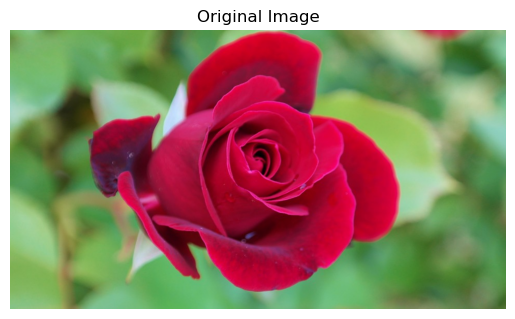

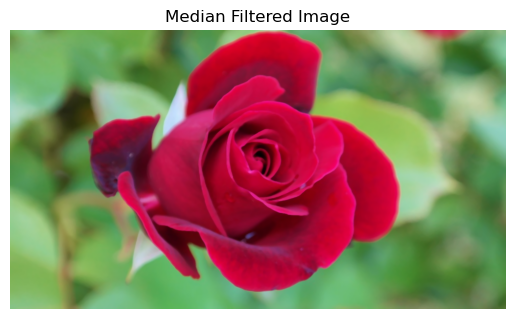

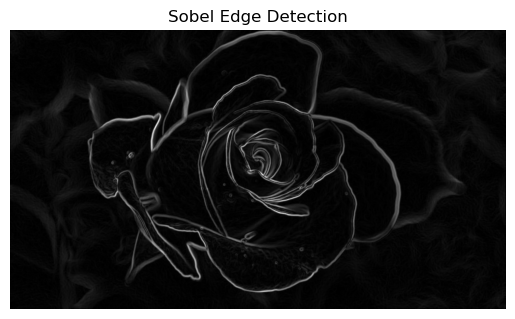

C:\Users\devik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


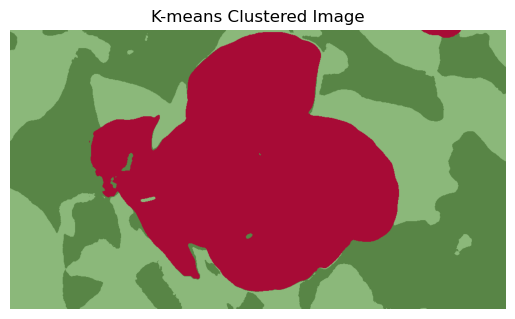

Jaccard Index: 0.9737204218106996
F-score: 0.9866852580036684
PSNR: 19.78726226750824 dB
Execution Time: 0.0 seconds


In [1]:
import numpy as np
import cv2
import time
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
from sklearn.metrics import jaccard_score, f1_score
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\devik\Downloads\rose4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Median Filtering for each color channel (R, G, B)
def median_filter(image):
    channels = cv2.split(image)  # Split into R, G, B channels
    filtered_channels = [cv2.medianBlur(channel, 5) for channel in channels]  # Apply median filter
    return cv2.merge(filtered_channels)  # Merge back to a single image

filtered_image = median_filter(image)

# Display the filtered image
plt.imshow(filtered_image)
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

# Edge Detection using Sobel
def sobel_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel in x direction
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel in y direction
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)  # Compute magnitude
    return sobel_magnitude

edges = sobel_edge_detection(image)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

# K-means Color Clustering
def k_means_clustering(image, n_clusters=3):
    pixels = image.reshape(-1, 3)  # Reshape to a list of pixels
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels)  # Fit the model
    clustered_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)  # Reshape back
    return clustered_image

clustered_image = k_means_clustering(filtered_image)

# Display the clustered image
plt.imshow(clustered_image)
plt.title('K-means Clustered Image')
plt.axis('off')
plt.show()

# Jaccard Index and F-score calculation
def calculate_jaccard_and_fscore(original, clustered):
    original_flat = original.flatten()
    clustered_flat = clustered.flatten()
    
    # Assuming binary images for Jaccard and F-score
    original_binary = (original_flat > 0).astype(int)
    clustered_binary = (clustered_flat > 0).astype(int)

    jaccard = jaccard_score(original_binary, clustered_binary)
    f_score = f1_score(original_binary, clustered_binary)
    
    return jaccard, f_score

jaccard, f_score = calculate_jaccard_and_fscore(image, clustered_image)

# PSNR Calculation
def calculate_psnr(original, compressed):
    original = img_as_float(original)
    compressed = img_as_float(compressed)
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    return psnr

psnr_value = calculate_psnr(image, clustered_image)

# Execution Time Measurement
start_time = time.time()
# Place the code block you want to measure here
end_time = time.time()
execution_time = end_time - start_time

# Output Results
print(f"Jaccard Index: {jaccard}")
print(f"F-score: {f_score}")
print(f"PSNR: {psnr_value} dB")
print(f"Execution Time: {execution_time} seconds")


# Multi otsu thresholding, gaussian filter, shape detection

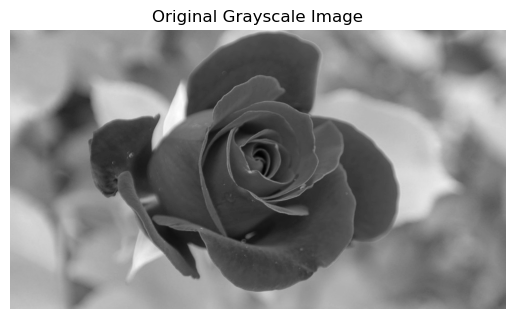

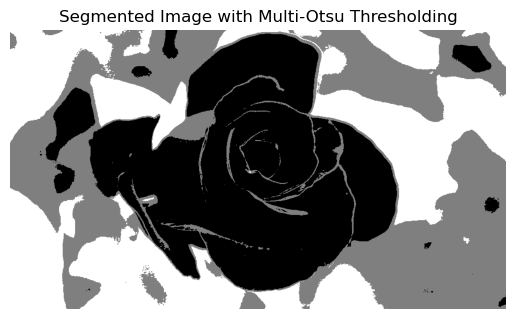

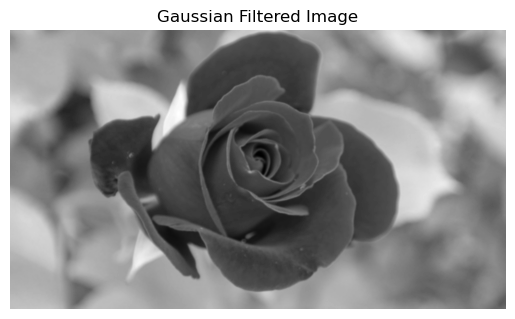

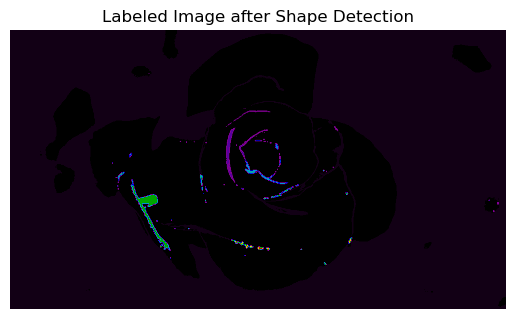

PSNR: 11.95175946098448 dB
Execution Time: 0.0 seconds
RAND Index: 0.0


In [2]:
import numpy as np
import cv2
import time
from skimage import filters, measure, img_as_float
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\devik\Downloads\rose4.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Multi-Otsu Thresholding
def multi_otsu_thresholding(image, num_thresholds=3):
    thresholds = filters.threshold_multiotsu(image, classes=num_thresholds)
    return thresholds

thresholds = multi_otsu_thresholding(image_gray)

# Create segmented image based on thresholds
def apply_thresholds(image, thresholds):
    regions = np.digitize(image, bins=thresholds)
    segmented_image = np.zeros_like(image)
    
    for i in range(len(thresholds) + 1):
        segmented_image[regions == i] = i * 255 // len(thresholds)  # Assign a value based on the region
    return segmented_image

segmented_image = apply_thresholds(image_gray, thresholds)

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image with Multi-Otsu Thresholding')
plt.axis('off')
plt.show()

# Apply Gaussian Filter
def apply_gaussian_filter(image, sigma=1):
    return cv2.GaussianBlur(image, (5, 5), sigma)

gaussian_filtered_image = apply_gaussian_filter(image_gray)

# Display Gaussian filtered image
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.show()

# Shape Detection and Segmentation
def shape_detection(segmented_image):
    labeled_image = measure.label(segmented_image > 0)  # Label the regions
    return labeled_image

labeled_image = shape_detection(segmented_image)

# Display the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Image after Shape Detection')
plt.axis('off')
plt.show()

# PSNR Calculation
def calculate_psnr(original, compressed):
    original = img_as_float(original)
    compressed = img_as_float(compressed)
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    return psnr

psnr_value = calculate_psnr(image_gray, segmented_image)

# Execution Time Measurement
start_time = time.time()
# Place the code block you want to measure here
end_time = time.time()
execution_time = end_time - start_time

# RAND Index Calculation
def calculate_rand_index(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels.flatten(), predicted_labels.flatten())

# Assuming true_labels are available for comparison
true_labels = np.zeros_like(segmented_image)  # Placeholder for true labels
rand_index = calculate_rand_index(true_labels, labeled_image)

# Output Results
print(f"PSNR: {psnr_value} dB")
print(f"Execution Time: {execution_time} seconds")
print(f"RAND Index: {rand_index}")


# Graphcut segmentation and wavelet transform

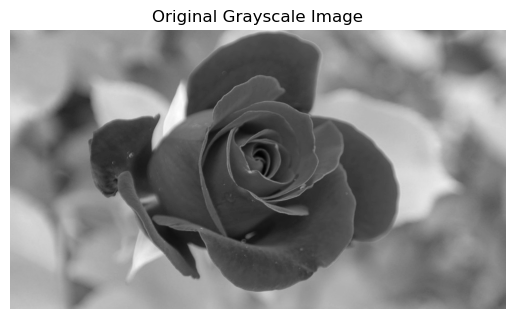

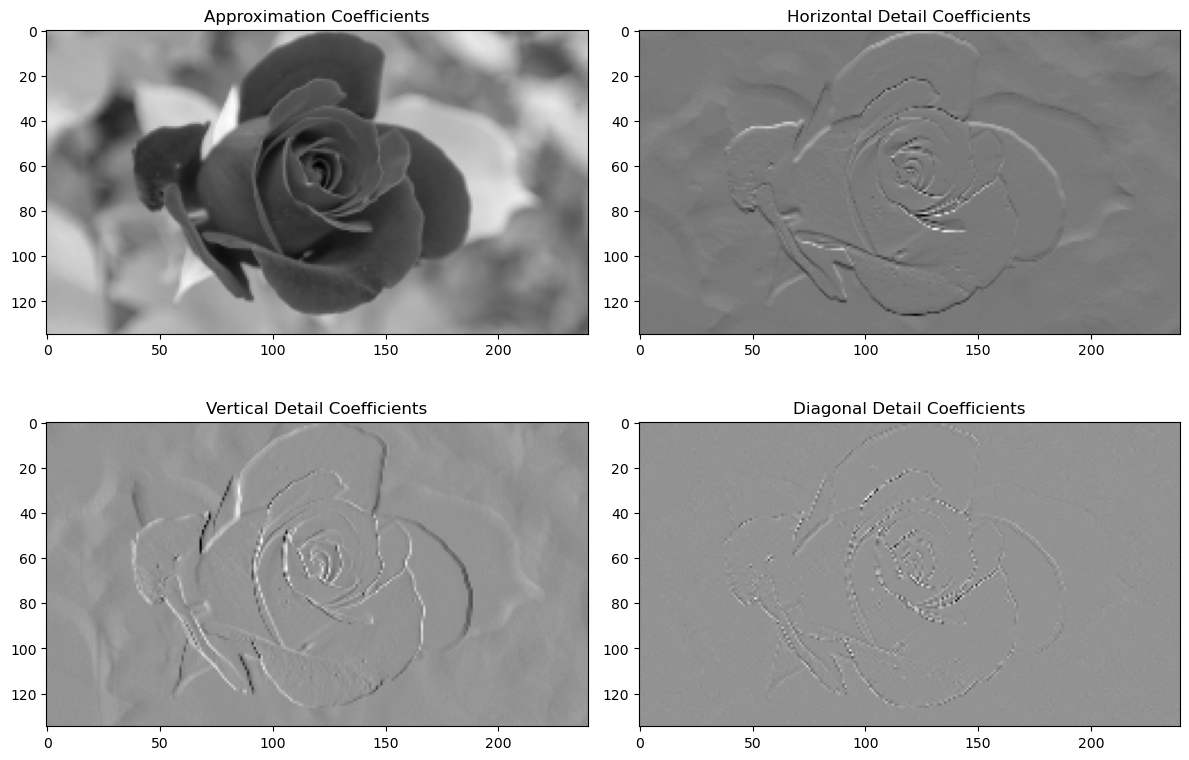

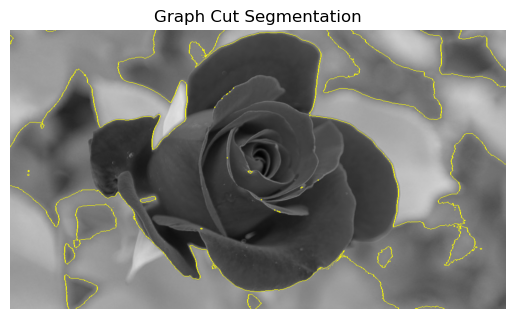

PSNR: 6.540310225598626 dB
Execution Time: 0.0 seconds
RAND Index: 0.0


In [3]:
import numpy as np
import cv2
import time
import pywt
from skimage import measure, img_as_float
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Load the image
image = cv2.imread(r"C:\Users\devik\Downloads\rose4.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Wavelet Transform
def wavelet_transform(image):
    coeffs = pywt.wavedec2(image, 'haar', level=2)
    return coeffs

coeffs = wavelet_transform(image_gray)

# Display Wavelet Coefficients
cA, (cH, cV, cD) = coeffs[0], coeffs[1]
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(cA, cmap='gray'), plt.title('Approximation Coefficients')
plt.subplot(222), plt.imshow(cH, cmap='gray'), plt.title('Horizontal Detail Coefficients')
plt.subplot(223), plt.imshow(cV, cmap='gray'), plt.title('Vertical Detail Coefficients')
plt.subplot(224), plt.imshow(cD, cmap='gray'), plt.title('Diagonal Detail Coefficients')
plt.tight_layout()
plt.show()

# Graph Cut Segmentation
def graph_cut_segmentation(image):
    # Convert to float for graph cut
    image_float = img_as_float(image)
    
    # Create a mask for the graph cut
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask[image > 128] = 1  # Example mask: foreground if pixel value > 128
    
    # Perform graph cut segmentation
    labels = measure.label(mask)
    return labels

labeled_image = graph_cut_segmentation(image_gray)

# Display the labeled image with boundaries
plt.imshow(mark_boundaries(image_gray, labeled_image), cmap='nipy_spectral')
plt.title('Graph Cut Segmentation')
plt.axis('off')
plt.show()

# PSNR Calculation
def calculate_psnr(original, compressed):
    original = img_as_float(original)
    compressed = img_as_float(compressed)
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    return psnr

psnr_value = calculate_psnr(image_gray, labeled_image)

# Execution Time Measurement
start_time = time.time()
# Place the code block you want to measure here
end_time = time.time()
execution_time = end_time - start_time

# RAND Index Calculation
def calculate_rand_index(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels.flatten(), predicted_labels.flatten())

# Assuming true_labels are available for comparison
true_labels = np.zeros_like(labeled_image)  # Placeholder for true labels
rand_index = calculate_rand_index(true_labels, labeled_image)

# Output Results
print(f"PSNR: {psnr_value} dB")
print(f"Execution Time: {execution_time} seconds")
print(f"RAND Index: {rand_index}")


# Watershed Segmentation

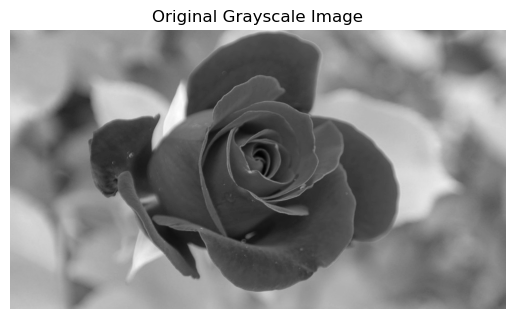

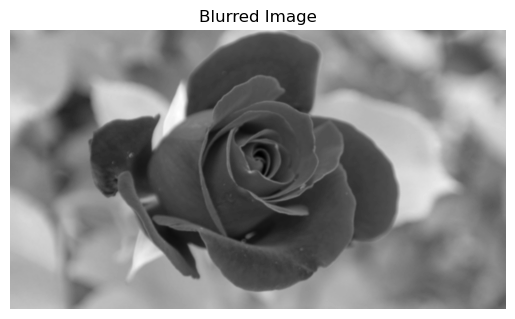

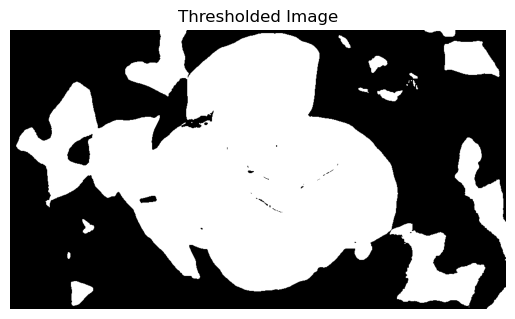

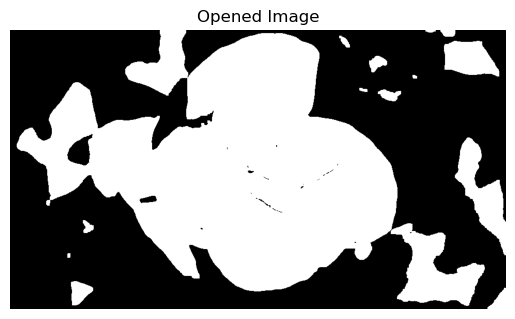

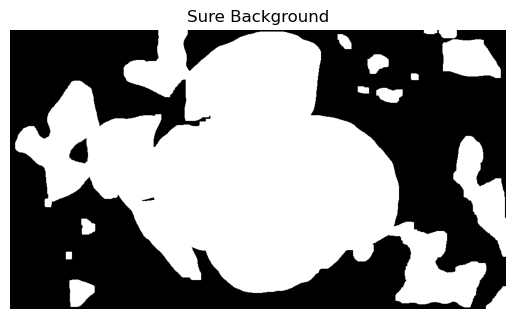

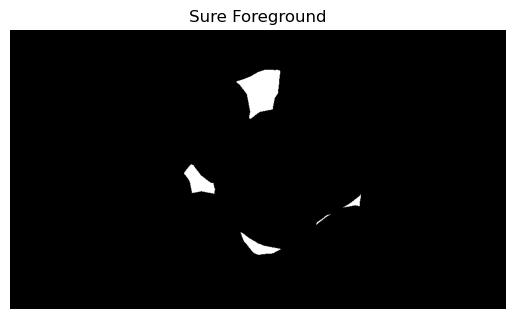

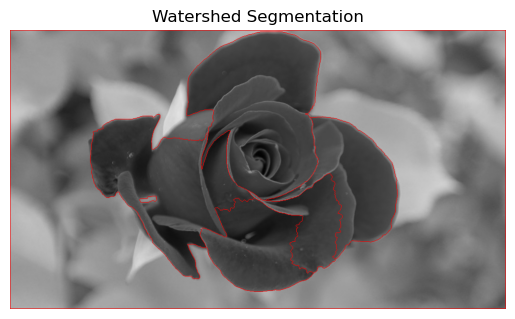

In [4]:
#watershed segmentation
import numpy as np
import cv2
from skimage import measure, morphology
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\devik\Downloads\rose4.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Preprocessing: Gaussian Blur
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

blurred_image = preprocess_image(image_gray)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Apply Otsu's thresholding
_, thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Remove small objects
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Display the opened image
plt.imshow(opening, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()

# Find sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Display the sure background
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.axis('off')
plt.show()

# Find sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Display the sure foreground
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.axis('off')
plt.show()

# Find unknown region
unknown = cv2.subtract(sure_bg.astype(np.uint8), sure_fg.astype(np.uint8))

# Label markers
markers = cv2.connectedComponents(sure_fg.astype(np.uint8))[1]
markers = markers + 1  # Increment all labels by 1
markers[unknown == 255] = 0  # Mark the unknown region with 0

# Apply watershed algorithm
image_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display the segmented image
plt.imshow(image_color)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()


In [13]:
!pip uninstall scikit-image -y
!pip install --upgrade scikit-image


Found existing installation: scikit-image 0.25.2
Uninstalling scikit-image-0.25.2:
  Successfully uninstalled scikit-image-0.25.2
  Using cached scikit_image-0.25.2-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_image-0.25.2-cp311-cp311-win_amd64.whl (12.8 MB)


# GLCM

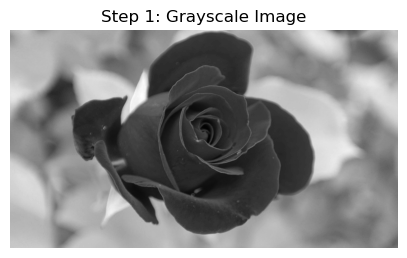

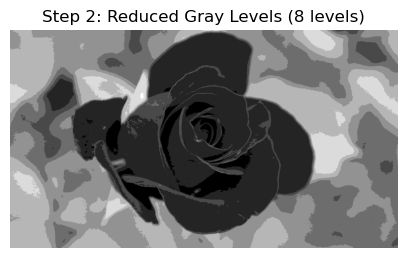

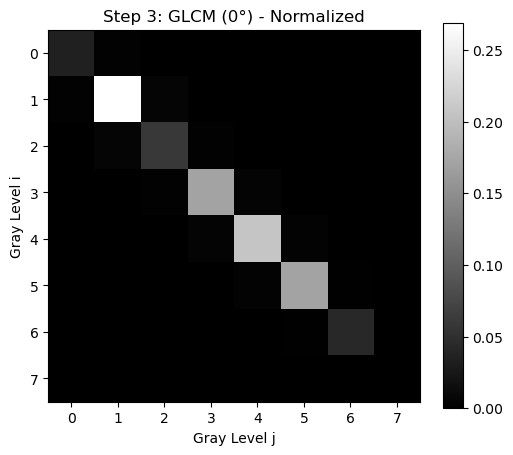

Normalized GLCM Matrix:
 [[3.45382922e-02 2.35971112e-03 3.47584289e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.37515931e-03 2.68771483e-01 5.54976248e-03 1.42895763e-04
  1.93102383e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.93102383e-05 5.70424439e-03 6.02865639e-02 2.89460472e-03
  3.28274051e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.79307149e-06 3.09156915e-03 1.72245395e-01
  4.20576990e-03 5.79307149e-06 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.72409532e-06 4.61707797e-03
  2.06891824e-01 3.52798054e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.86204766e-06
  3.90839223e-03 1.71658363e-01 1.83640366e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.86150697e-03 4.31815549e-02 4.82755957e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.8275

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Step 1: Load image
image_path = r"C:\Users\devik\Downloads\rose4.jpg"  # Replace with your image path
image = imageio.imread(image_path)

# Step 2: Convert to grayscale
if image.ndim == 3:
    grayscale_image = rgb2gray(image)
else:
    grayscale_image = image

# Display Grayscale Image
plt.figure(figsize=(5, 5))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Step 1: Grayscale Image")
plt.axis('off')
plt.show()

# Step 3: Convert to 8-bit unsigned byte
image_ubyte = img_as_ubyte(grayscale_image)

# Step 4: Reduce gray levels
levels = 8
reduced_image = (image_ubyte / (256 / levels)).astype(np.uint8)

# Display Reduced Gray Level Image
plt.figure(figsize=(5, 5))
plt.imshow(reduced_image, cmap='gray', vmin=0, vmax=levels - 1)
plt.title("Step 2: Reduced Gray Levels (8 levels)")
plt.axis('off')
plt.show()

# Step 5: Manually Compute GLCM at 0° (horizontal, distance=1)
distance = 1
rows, cols = reduced_image.shape
glcm = np.zeros((levels, levels), dtype=int)

for i in range(rows):
    for j in range(cols - distance):
        row_val = reduced_image[i, j]
        col_val = reduced_image[i, j + distance]
        glcm[row_val, col_val] += 1

# Step 6: Normalize the GLCM
glcm_normalized = glcm / glcm.sum()

# Step 7: Display the GLCM
plt.figure(figsize=(6, 5))
plt.imshow(glcm_normalized, cmap='gray')
plt.title("Step 3: GLCM (0°) - Normalized")
plt.xlabel("Gray Level j")
plt.ylabel("Gray Level i")
plt.colorbar()
plt.show()

# Optional: Print GLCM values
print("Normalized GLCM Matrix:\n", glcm_normalized)


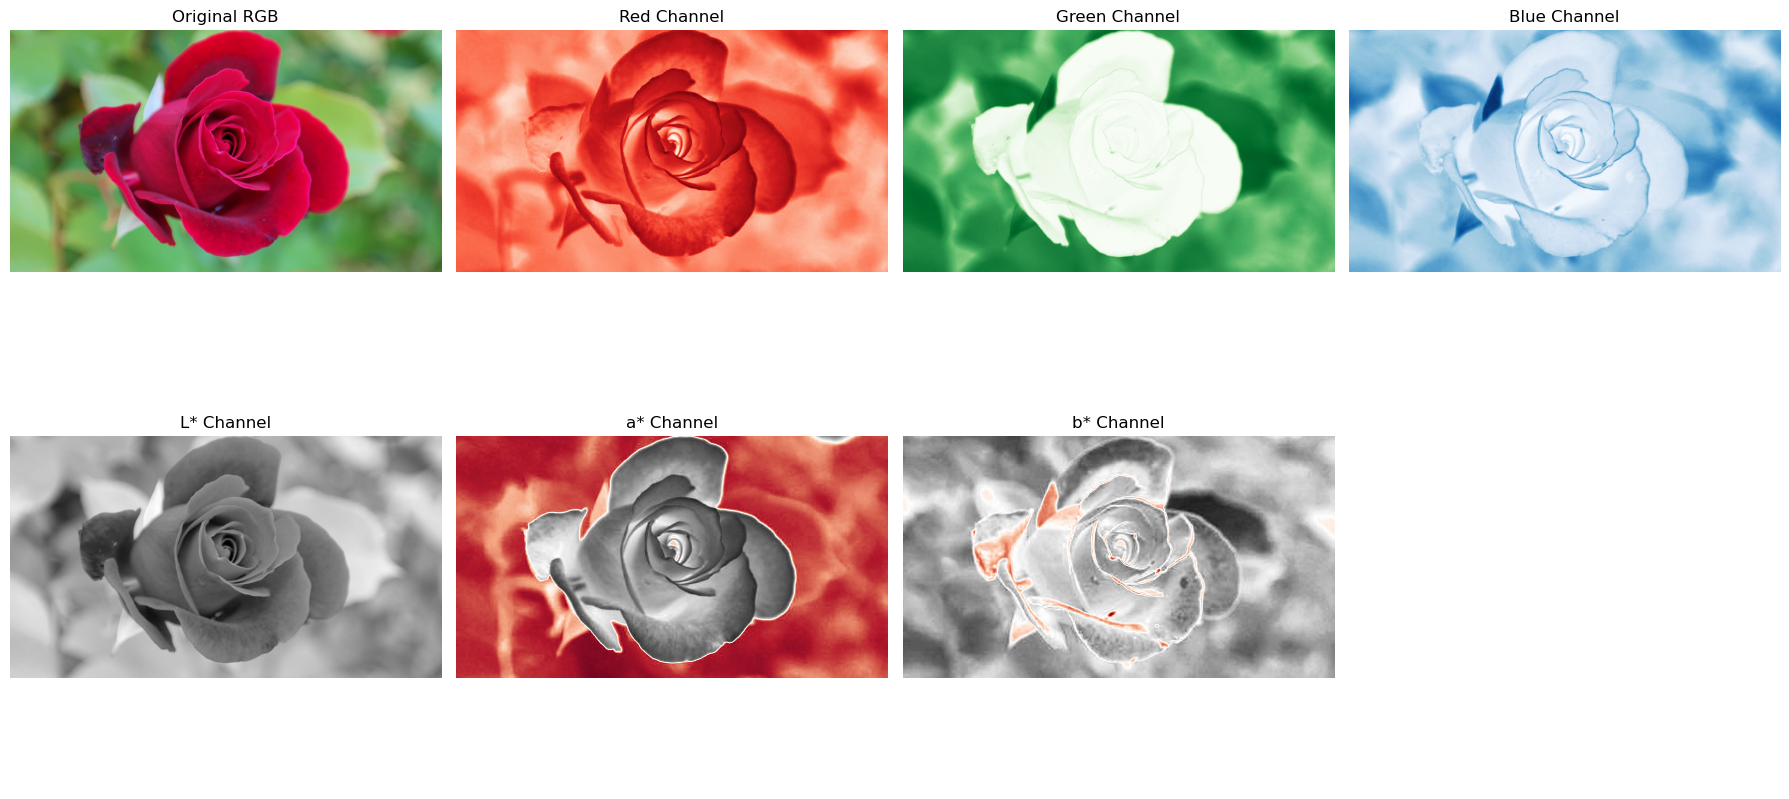

In [18]:
#RGB to LAB
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import rgb2lab

# Step 1: Load RGB image
image_path = r"C:\Users\devik\Downloads\rose4.jpg"  # Replace with your image path
image = imageio.imread(image_path)

# Step 2: Split into R, G, B channels
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

# Step 3: Convert to Lab color space
lab_image = rgb2lab(image / 255.0)  # Convert to float [0,1] before conversion
L = lab_image[:, :, 0]
a = lab_image[:, :, 1]
b = lab_image[:, :, 2]

# Step 4: Plotting all results
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

# Original
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original RGB")
axs[0, 0].axis('off')

# RGB Channels
axs[0, 1].imshow(R, cmap='Reds')
axs[0, 1].set_title("Red Channel")
axs[0, 1].axis('off')

axs[0, 2].imshow(G, cmap='Greens')
axs[0, 2].set_title("Green Channel")
axs[0, 2].axis('off')

axs[0, 3].imshow(B, cmap='Blues')
axs[0, 3].set_title("Blue Channel")
axs[0, 3].axis('off')

# Lab Channels
axs[1, 0].imshow(L, cmap='gray')
axs[1, 0].set_title("L* Channel")
axs[1, 0].axis('off')

axs[1, 1].imshow(a, cmap='RdGy')
axs[1, 1].set_title("a* Channel")
axs[1, 1].axis('off')

axs[1, 2].imshow(b, cmap='RdGy')
axs[1, 2].set_title("b* Channel")
axs[1, 2].axis('off')

axs[1, 3].axis('off')  # Empty for layout symmetry

plt.tight_layout()
plt.show()
